In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from collections import Counter


# For better visuals
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

In [ ]:
#  Indian Startup Funding EDA

###  Objective:
# To analyze Indian startup funding trends over time and extract insights on top sectors, investors, cities, and overall growth using visualizations.

In [8]:
# 2. Load the Dataset
df = pd.read_csv(r"C:\Users\LEGION\Desktop\Py projects\startup funding\startup_funding.csv")
df.head(10)

,Date,StartupName,CityLocation,IndustryVertical,AmountInUSD,InvestorsName
0,09-11-2019,Paytm,Chennai,E-commerce,1.453572e+08,SoftBank
1,18-04-2020,Zomato,Hyderabad,Food Delivery,4.649822e+07,"Nexus Venture Partners, Kalaari Capital"
2,23-06-2017,Paytm,Chennai,Food Delivery,1.543602e+08,"SoftBank, Blume Ventures"
3,25-01-2015,Unacademy,Pune,Travel,1.415470e+08,"Kalaari Capital, Nexus Venture Partners, Tiger..."
4,04-08-2015,CureFit,Bangalore,Logistics,5.690570e+07,Tiger Global
5,06-10-2021,Paytm,Kolkata,E-commerce,9.584877e+07,"Sequoia Capital, SoftBank, Matrix Partners"
6,27-11-2015,Meesho,Delhi,Food Delivery,1.347351e+08,SoftBank
7,24-05-2020,Unacademy,Chennai,Edtech,1.856839e+08,"Nexus Venture Partners, Sequoia Capital"
8,01-11-2021,Razorpay,Pune,Food Delivery,8.783429e+07,"Nexus Venture Partners, Sequoia Capital"
9,13-09-2022,Byju's,Kolkata,Food Delivery,1.763790e+08,Kalaari Capital


In [3]:
###  Data Cleaning
# - Standardize column names
# - Parse date column
# - Clean `amount` values
# - Normalize text (city, sector, investor names)

In [9]:
# 3. Clean the Dataset

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['startupname'] = df['startupname'].str.strip()
df['citylocation'] = df['citylocation'].str.title().str.strip()
df['industryvertical'] = df['industryvertical'].str.title().str.strip()
df['amountinusd'] = df['amountinusd'].replace('[\$,]', '', regex=True).astype(float)

# Drop rows with missing critical info
df = df.dropna(subset=['date', 'amountinusd'])
df.head(10)
len(df)

79

In [5]:
##  Exploratory Data Analysis (EDA)

### 1. Funding Trend Over the Years

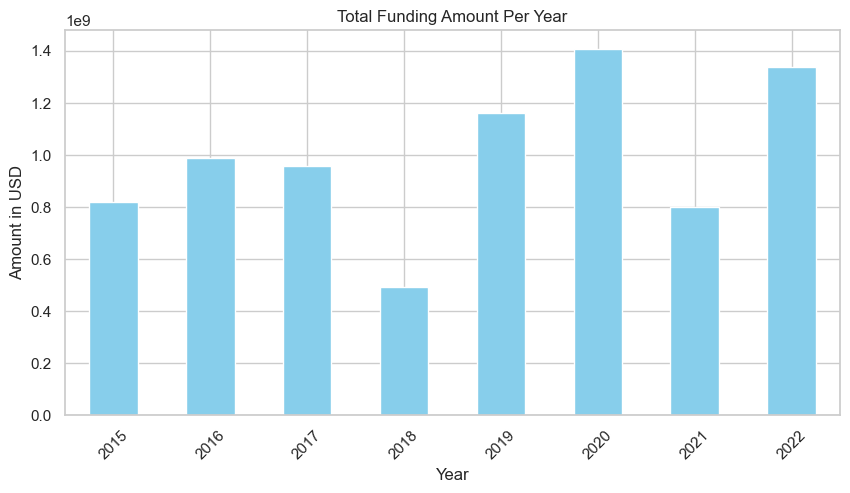

In [10]:
# 4. Funding over years

df['year'] = df['date'].dt.year
yearly_funding = df.groupby('year')['amountinusd'].sum()

yearly_funding.plot(kind='bar', color='skyblue')
plt.title("Total Funding Amount Per Year")
plt.ylabel("Amount in USD")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.show()

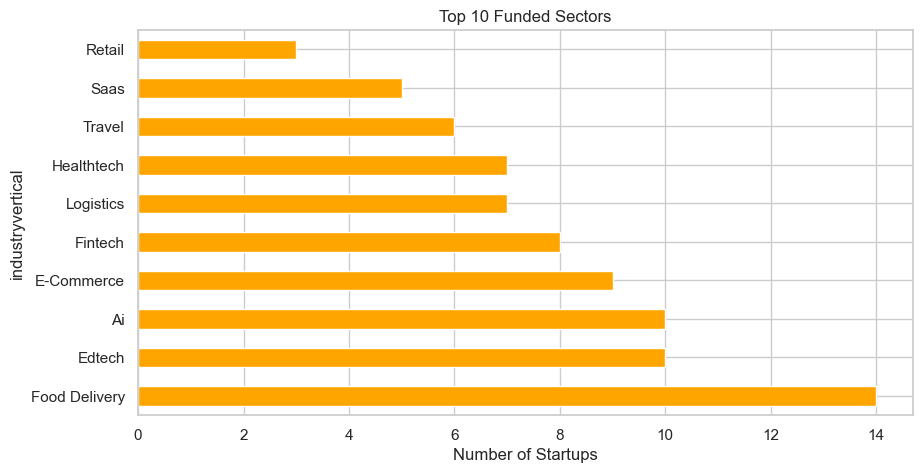

In [7]:
### 2. Most Funded Sectors
df['industryvertical'].value_counts().head(10).plot(kind='barh', color='orange')
plt.title("Top 10 Funded Sectors")
plt.xlabel("Number of Startups")
plt.show()

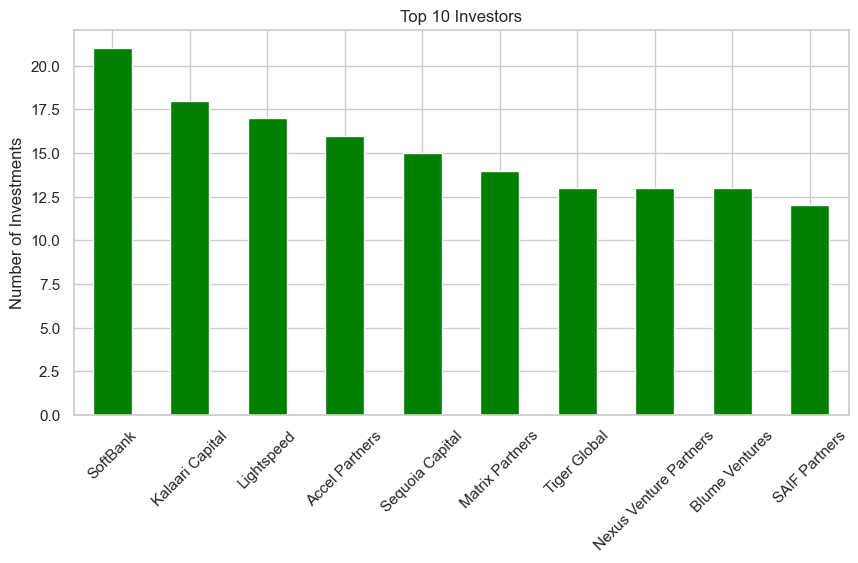

In [8]:
### 3. Top Investors
investors = df['investorsname'].dropna().str.split(', ')
flat_investors = [inv.strip() for sublist in investors for inv in sublist]
top_investors = pd.Series(flat_investors).value_counts().head(10)

top_investors.plot(kind='bar', color='green')
plt.title("Top 10 Investors")
plt.ylabel("Number of Investments")
plt.xticks(rotation=45)
plt.show()

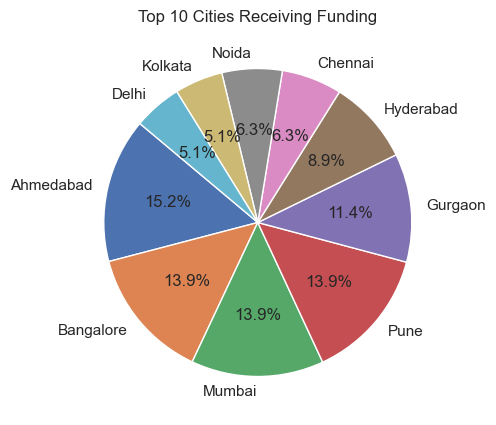

In [9]:
### 4. Funding Distribution by City
df['citylocation'].value_counts().head(10).plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Cities Receiving Funding")
plt.ylabel('')
plt.show()

In [13]:
### 5. Interactive Plot (Plotly)
top_sectors = df['industryvertical'].value_counts().head(10).index
top_sector_df = df[df['industryvertical'].isin(top_sectors)]
fig = px.box(top_sector_df, x='industryvertical', y='amountinusd', color='industryvertical',title='Funding Amounts Across Top Sectors')
fig.write_html("Visuals/5. funding_top_sectors_boxplot.html")
fig.show()